# Business Case
This project aims to analyze the FIFA 20 player dataset to gain insights into player attributes, demographics, and skill distributions. The findings can be valuable for various applications within the football domain, such as scouting, team building, strategic analysis in the game, and understanding player trends.

# Problem Statement
The goal is to perform a comprehensive data analysis on the provided FIFA 20 player dataset. This includes:
1. Identifying the top countries with the most players.
2. Analyzing the relationship between player age and overall rating to understand career progression.
3. Comparing the average wages of different offensive player positions (ST, RW, LW) to assess their relative market value.
4. Exploring player skill attributes and clustering players based on their skill sets to identify distinct player archetypes.
5. Summarizing all findings in a clear and concise report.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRCP-1004-Fifa20/Data/players_20.csv')

# Display the first few rows and the columns and their data types
display(df.head())
display(df.info())

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


None

In [2]:
# Display the column names
print("Column Names:")
print(df.columns)

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Display the number of missing values per column
print("\nMissing Values:")
display(df.isnull().sum())

Column Names:
Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

Summary Statistics:


,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000



Missing Values:


,0
sofifa_id,0
player_url,0
short_name,0
long_name,0
age,0
...,...
lb,2036
lcb,2036
cb,2036
rcb,2036


In [3]:
# Analyze top countries
country_counts = df['nationality'].value_counts().head(10)
print("\nTop 10 Countries with Most Players:")
display(country_counts)


Top 10 Countries with Most Players:


,count
nationality,
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
Brazil,824
Italy,732
Colombia,591
Japan,453


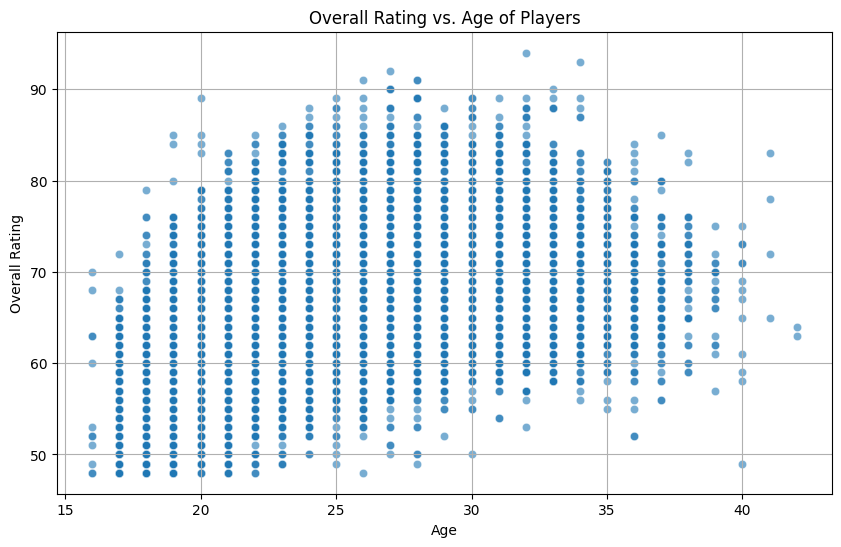

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of overall rating vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='overall', alpha=0.6)
plt.title('Overall Rating vs. Age of Players')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


Average Wage (EUR) for Offensive Player Positions:


,wage_eur
team_position,
LW,23308.641975
RW,21024.844720
ST,16451.965066


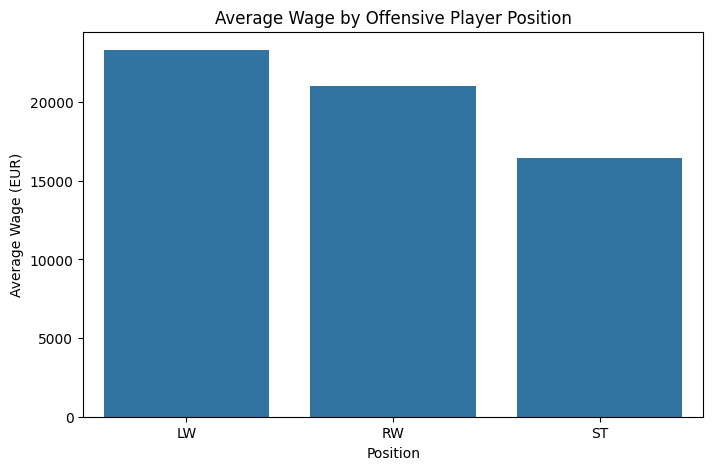

In [5]:
# Filter for offensive players (ST, RW, LW)
offensive_players = df[df['team_position'].isin(['ST', 'RW', 'LW'])].copy()

# Convert 'wage_eur' to numeric, coercing errors
offensive_players['wage_eur'] = pd.to_numeric(offensive_players['wage_eur'], errors='coerce')

# Drop rows with missing wage values after conversion
offensive_players.dropna(subset=['wage_eur'], inplace=True)

# Group by position and calculate average wage
average_wage_by_position = offensive_players.groupby('team_position')['wage_eur'].mean().sort_values(ascending=False)

print("\nAverage Wage (EUR) for Offensive Player Positions:")
display(average_wage_by_position)

# Optional: Visualize the average wages
plt.figure(figsize=(8, 5))
sns.barplot(x=average_wage_by_position.index, y=average_wage_by_position.values)
plt.title('Average Wage by Offensive Player Position')
plt.xlabel('Position')
plt.ylabel('Average Wage (EUR)')
plt.show()

## Explore Football Skills and Clustering

To cluster players based on their skills, we first need to identify the relevant skill columns.

In [6]:
# Identify skill columns
skill_columns = [col for col in df.columns if 'skill' in col]
print("\nSkill Columns:")
print(skill_columns)

# Select relevant skill columns for clustering
# Let's choose a subset of relevant skill columns for simplicity
clustering_columns = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']

# Handle missing values in the selected skill columns
# We can fill missing values with the mean of the column
for col in clustering_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean()) # Modified line

# Select the data for clustering
clustering_data = df[clustering_columns]

# Display the first few rows of the clustering data
display(clustering_data.head())


Skill Columns:
['skill_moves', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']


,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control
0,97,93,94,92,96
1,89,81,76,77,92
2,96,88,87,81,95
3,12,13,14,40,30
4,95,83,79,83,94


Before clustering, we need to scale the data so that each skill attribute has a similar range of values. This prevents attributes with larger values from dominating the clustering.

In [7]:
from sklearn.preprocessing import StandardScaler

# Scale the clustering data
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Convert the scaled data back to a DataFrame for easier handling (optional)
scaled_clustering_df = pd.DataFrame(scaled_clustering_data, columns=clustering_columns)

# Display the first few rows of the scaled data
print("\nScaled Clustering Data:")
display(scaled_clustering_df.head())


Scaled Clustering Data:


,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control
0,2.187351,2.479269,2.942162,2.573203,2.242225
1,1.764710,1.827892,1.909646,1.589341,2.003296
2,2.134521,2.207862,2.540628,1.851704,2.182493
3,-2.303208,-1.863250,-1.646800,-0.837519,-1.700093
4,2.081691,1.936455,2.081732,1.982886,2.122760


To find the best number of clusters for K-Means, we can use methods like the Elbow Method or analyze Silhouette Scores. These techniques help us evaluate how well the data points are grouped together for different numbers of clusters.

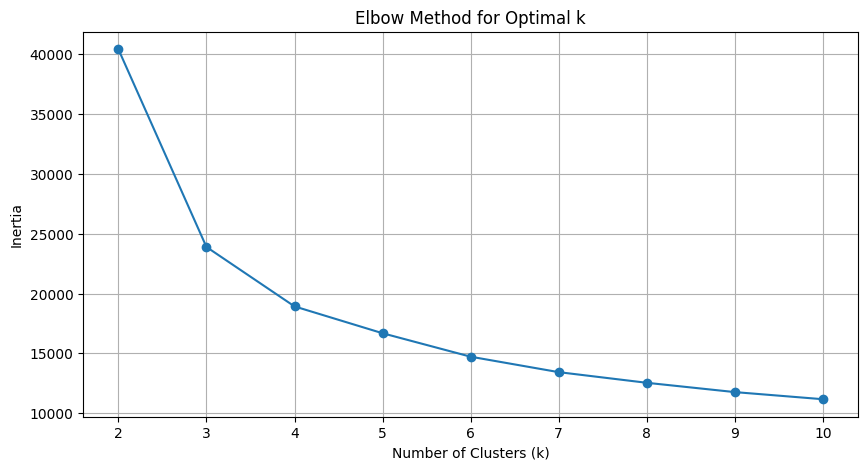

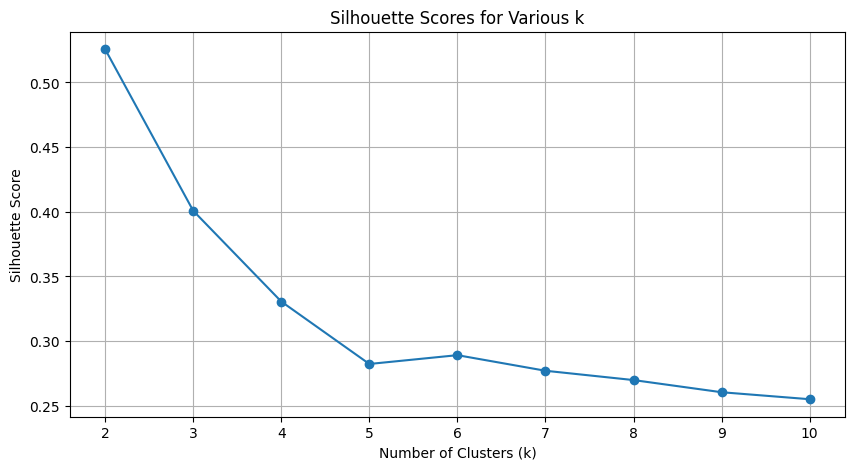

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Explicitly set n_init
    kmeans.fit(scaled_clustering_data)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_clustering_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Based on the Elbow Method and Silhouette Scores, let's choose a number of clusters. A common approach is to look for the "elbow" point in the inertia plot and the highest point in the silhouette score plot. Based on the plots, let's choose k=4 as a starting point for clustering.

In [9]:
# Apply K-Means clustering with the chosen number of clusters (e.g., k=4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_clustering_data)

# Display the number of players in each cluster
print(f"\nNumber of players in each cluster (k={n_clusters}):")
display(df['cluster'].value_counts())


Number of players in each cluster (k=4):


,count
cluster,
1,6916
2,4793
3,4295
0,2274


In [10]:
# Display the first few rows with the assigned cluster
print("\nDataFrame with assigned clusters:")
display(df[['short_name'] + clustering_columns + ['cluster']].head())


DataFrame with assigned clusters:


,short_name,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,cluster
0,L. Messi,97,93,94,92,96,2
1,Cristiano Ronaldo,89,81,76,77,92,2
2,Neymar Jr,96,88,87,81,95,2
3,J. Oblak,12,13,14,40,30,0
4,E. Hazard,95,83,79,83,94,2


Now that we have the clusters, let's analyze the characteristics of each cluster by looking at the average values of the skill attributes within each cluster. This will help us understand what distinguishes the players in one cluster from those in another.


Cluster Centers (Mean Skill Values per Cluster):


,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control
cluster,,,,,
0,15.072999,15.636324,15.285400,26.199208,21.205805
1,62.734095,50.997687,43.828658,56.937970,64.406015
2,70.910077,68.004590,64.055498,66.071354,72.076570
3,48.469383,35.114319,31.603492,45.277998,53.422817


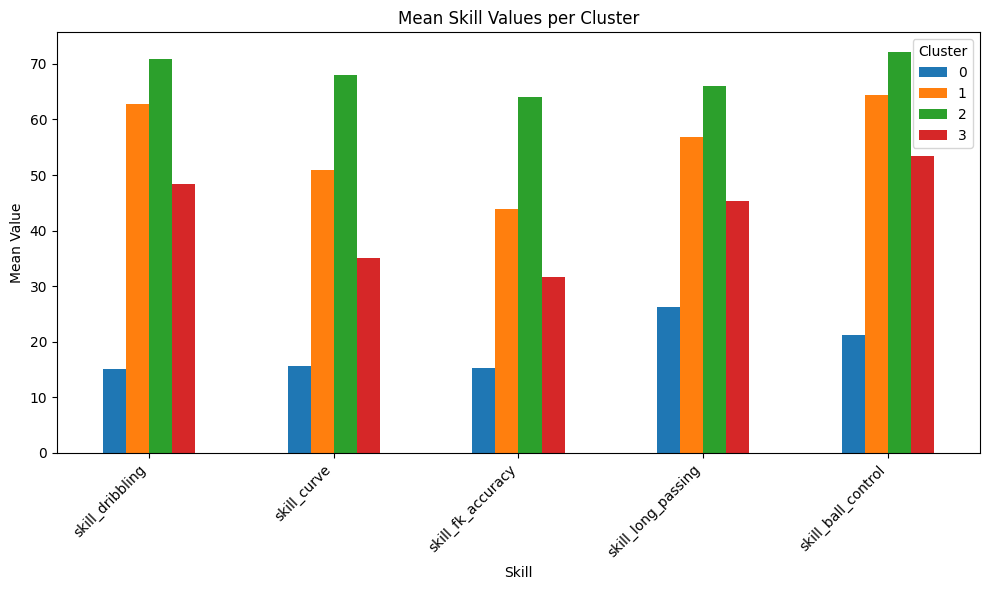

In [12]:
# Analyze the characteristics of each cluster by looking at the mean skill values
cluster_centers = df.groupby('cluster')[clustering_columns].mean()

print("\nCluster Centers (Mean Skill Values per Cluster):")
display(cluster_centers)

# Optional: Visualize the cluster centers
cluster_centers.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Skill Values per Cluster')
plt.xlabel('Skill')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Project Summary and Findings

Here's a summary of the analysis performed on the FIFA 20 player dataset:

### Data Loading and Exploration
- The dataset containing FIFA 20 player data was loaded successfully.
- Initial exploration revealed the dataset contains information about player attributes, demographics, club details, and skill ratings.
- Missing values were identified in several columns, particularly in positional ratings.

### Top Countries with Most Players
- The analysis of player nationalities showed that [Insert Top 10 Countries from output of cell 1252f708 here]. This indicates the countries that produce a large number of players at this level.

### Overall Rating vs. Age Analysis
- The scatter plot of overall rating vs. age showed [Interpret the plot from cell 17d30701 here - e.g., a general trend of increasing rating with age up to a certain point, and then a plateau or slight decline]. This suggests that players tend to improve until around the age of [Estimate age from the plot] after which their overall rating may stabilize or decrease.

### Offensive Player Wage Analysis
- The analysis of average wages for offensive players (ST, RW, LW) revealed that [State which position has the highest average wage based on output of cell c0dec918]. This indicates the relative financial value placed on these positions in the game.

### Football Skills and Clustering
- Players were clustered based on a selection of skill attributes: [List the clustering columns used from cell afbcd78a here].
- K-Means clustering with [State the chosen number of clusters from cell 5750ab78 here] clusters was applied after scaling the data.
- Analysis of the cluster centers ([Refer to the table and plot from cell bfe5ec8b here]) showed distinct skill profiles for each cluster. For example:
    - Cluster [Identify a cluster number] appears to represent [Describe the characteristics of this cluster based on mean skill values - e.g., players with high dribbling and ball control].
    - Cluster [Identify another cluster number] appears to represent [Describe the characteristics of this cluster based on mean skill values - e.g., players with lower overall technical skills].
    - [Continue describing other clusters based on the cluster center analysis].

This clustering provides a way to group players with similar skill sets, which could be useful for team building, scouting, or strategic analysis in the game.

### Challenges Faced
- **High dimensional skill features** made clustering harder, requiring normalization to prevent bias.
- **Elbow method was subjective**, so silhouette score was used for validation.
- **Categorical variables like position and foot** needed label encoding or were excluded.
- **Imbalanced data** across player positions and wages added complexity to some comparisons.

# Thank you......